# Exam 16th of June 2025, 13.00-18.00 for the course 1MS041 (Introduction to Data Science / Introduktion till dataanalys)

## Instructions:
1. Complete the problems by following instructions.
2. When done, submit this file with your solutions saved, following the instruction sheet.

This exam has 3 problems for a total of 40 points, to pass you need
20 points. The bonus will be added to the score of the exam and rounded afterwards.

## Some general hints and information:
* Try to answer all questions even if you are uncertain.
* Comment your code, so that if you get the wrong answer I can understand how you thought
this can give you some points even though the code does not run.
* Follow the instruction sheet rigorously.
* This exam is partially autograded, but your code and your free text answers are manually graded anonymously.
* If there are any questions, please ask the exam guards, they will escalate it to me if necessary.

## Tips for free text answers
* Be VERY clear with your reasoning, there should be zero ambiguity in what you are referring to.
* If you want to include math, you can write LaTeX in the Markdown cells, for instance `$f(x)=x^2$` will be rendered as $f(x)=x^2$ and `$$f(x) = x^2$$` will become an equation line, as follows
$$f(x) = x^2$$
Another example is `$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$` which renders as
$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$

## Finally some rules:
* You may not communicate with others during the exam, for example:
    * You cannot ask for help in Stack-Overflow or other such help forums during the Exam.
    * You may not communicate with AI's, for instance ChatGPT.
    * Your on-line and off-line activity is being monitored according to the examination rules.

## Good luck!

In [64]:
# Insert your anonymous exam ID as a string in the variable below
examID="0015-AOG"


---
## Exam vB, PROBLEM 1
Maximum Points = 14


In this problem you will do rejection sampling from complicated distributions, you will also be using your samples to compute certain integrals, a method known as Monte Carlo integration: (Keep in mind that choosing a good sampling distribution is often key to avoid too much rejection)

1. [4p] Fill in the remaining part of the function `problem1_rejection` in order to produce samples from the below distribution using rejection sampling: (Hint: $F$ is the distribution function)

$$
    F[x] = 
    \begin{cases}
        0, & x \leq 0 \\
        \frac{e^{x^2}-x^2-1}{e-2}, & 0 < x < 1 \\
        1, & x \geq 1
    \end{cases}
$$

2. [2p] Produce 100000 samples (**use fewer if it takes too long (more than 10 sec) and you cannot find a solution**) and put the answer in `problem1_samples` from the above distribution and plot the histogram together with the true density. 
3. [2p] Use the above 100000 samples (`problem1_samples`) to approximately compute the integral

$$
    \int_0^{1} \sin(x) \frac{2(e^{x^2}-1) x}{e-2} dx
$$
and store the result in `problem1_integral`.

4. [2p] Use Hoeffdings inequality to produce a 95\% confidence interval of the integral above and store the result as a tuple in the variable `problem1_interval`

5. [4p] Fill in the remaining part of the function `problem1_rejection_2` in order to produce samples from the below distribution using rejection sampling:
$$
    F[x] = 
    \begin{cases}
        0, & x \leq 0 \\
        20xe^{20-1/x}, & 0 < x < \frac{1}{20} \\
        1, & x \geq \frac{1}{20}
    \end{cases}
$$
Hint: this is tricky because if you choose the wrong sampling distribution you reject at least 9 times out of 10. You will get points based on how long your code takes to create a certain number of samples, if you choose the correct sampling distribution you can easily create 100000 samples within 2 seconds.

## Rejection sampling for the distribution with CDF
We are given the distribution function
$$
F[x] =
\begin{cases}
0, & x \le 0, \\
\dfrac{e^{x^2} - x^2 - 1}{e - 2}, & 0 < x < 1, \\
1, & x \ge 1.
\end{cases}
$$

We want to sample from this distribution using rejection sampling.

---

### 1. Density $( f(x) )$ from $( F(x) )$

On $(0 < x < 1)$,
$$
F(x) = \frac{e^{x^2} - x^2 - 1}{e - 2}.
$$

Differentiate:
- $(\frac{d}{dx} e^{x^2} = 2x e^{x^2})$,
- $(\frac{d}{dx}(-x^2) = -2x)$,
- $(\frac{d}{dx}(-1) = 0)$.

Thus
$$
f(x) = F'(x)
= \frac{2x e^{x^2} - 2x}{e - 2}
= \frac{2x\big(e^{x^2} - 1\big)}{e - 2}, \quad 0 < x < 1.
$$

Outside $((0,1))$, the density is zero. So
$$
f(x) =
\begin{cases}
\dfrac{2x\big(e^{x^2} - 1\big)}{e - 2}, & 0 < x < 1, \\
0, & \text{otherwise.}
\end{cases}
$$

---

### 2. Unnormalized target density

For rejection sampling we use an unnormalized target
$(\tilde f(x))$ proportional to $(f(x))$. A convenient choice is
to drop the constant factor $(2/(e-2))$ and use
$$
\tilde f(x) = x\big(e^{x^2} - 1\big), \quad 0 < x < 1,
$$
and $(\tilde f(x) = 0)$ otherwise.

---

### 3. Proposal distribution $(g(x))$

We choose the proposal
$$
X \sim \text{Uniform}(0,1).
$$

The corresponding proposal density is
$$
g(x) =
\begin{cases}
1, & 0 \le x \le 1, \\
0, & \text{otherwise.}
\end{cases}
$$

---

### 4. Find $( M )$ such that $( \tilde f(x) \le M g(x) )$

Since $(g(x) = 1)$ on $([0,1])$, we need
$$
\tilde f(x) \le M \quad \text{for all } x \in [0,1].
$$

Recall
$$
\tilde f(x) = x\big(e^{x^2} - 1\big).
$$

Differentiate:
$$
\tilde f'(x) = \big(e^{x^2} - 1\big) + x \cdot 2x e^{x^2}
= \big(e^{x^2} - 1\big) + 2x^2 e^{x^2}.
$$

For $(0 < x \le 1)$, both terms are positive, hence
$(\tilde f'(x) > 0)$ on $((0,1])$. Thus $(\tilde f(x))$ is
increasing on $([0,1])$, and its maximum on $([0,1])$ occurs at
$(x = 1)$:
$$
\tilde f(1) = 1 \cdot (e^1 - 1) = e - 1.
$$

Therefore we can choose
$$
M = e - 1.
$$
Then, for all $(x \in [0,1])$,
$$
\tilde f(x) \le e - 1 = M.
$$

---

### 5. Acceptance probability

The acceptance condition in rejection sampling is
$$
U \le \frac{\tilde f(X)}{M g(X)},
$$
where $(U \sim \text{Uniform}(0,1))$.

Here,
- $(\tilde f(x) = x(e^{x^2} - 1))$,
- $(g(x) = 1)$ on $([0,1])$,
- $(M = e - 1)$.

Thus the acceptance probability is
$$
\alpha(x) = \frac{\tilde f(x)}{M g(x)}
= \frac{x\big(e^{x^2} - 1\big)}{e - 1}.
$$

By construction, $(0 \le \alpha(x) \le 1)$ for $(x \in [0,1])$.

---

### 6. Rejection sampling algorithm

To generate one sample from the target distribution:

1. Draw $(X \sim \text{Uniform}(0,1))$.
2. Compute
   $$
   w = \frac{X\big(e^{X^2} - 1\big)}{e - 1}.
   $$
3. Draw $(U \sim \text{Uniform}(0,1))$.
4. If $(U \le w)$, accept $(X)$ as a sample.
5. Otherwise, reject $(X)$ and return to step 1.

To obtain $(n_{\text{samples}})$ values, repeat this procedure
until you have accepted $(n_{\text{samples}})$ samples.

No normalization constant from the original $(F(x))$ is needed;
we work entirely with $(\tilde f(x))$ and the bound $(M)$.


### The acceptance rate is always 1 / M

# This is actually the correct way to solve it:

## Rejection sampling — step by step (with derivations)

We are given the CDF

$$
F(x)=
\begin{cases}
0, & x \le 0,\\[4pt]
\dfrac{e^{x^2}-x^2-1}{e-2}, & 0<x<1,\\[6pt]
1, & x \ge 1.
\end{cases}
$$

Our goal is to sample from this distribution using the Accept–Reject (rejection sampling) method.

---

## Step 1: Derive the PDF $f(x)$ from the CDF $F(x)$

On the interval $0<x<1$, the density is the derivative of the CDF:

$$
f(x)=F'(x).
$$

Differentiate:

$$
F(x)=\frac{e^{x^2}-x^2-1}{e-2}.
$$

The denominator $(e-2)$ is constant, so

$$
f(x)=\frac{d}{dx}\left(\frac{e^{x^2}-x^2-1}{e-2}\right)
=\frac{1}{e-2}\frac{d}{dx}\left(e^{x^2}-x^2-1\right).
$$

Now compute the derivative in the numerator:

- $\frac{d}{dx}e^{x^2}=e^{x^2}\cdot 2x$
- $\frac{d}{dx}(-x^2)=-2x$
- $\frac{d}{dx}(-1)=0$

So

$$
\frac{d}{dx}\left(e^{x^2}-x^2-1\right)=2x e^{x^2}-2x = 2x(e^{x^2}-1).
$$

Therefore, for $0<x<1$,

$$
f(x)=\frac{2x(e^{x^2}-1)}{e-2}.
$$

And $f(x)=0$ outside $[0,1]$.

---

## Step 2: Choose a proposal density $g(x)$

A simple valid choice is the uniform distribution on $[0,1]$:

$$
g(x)=1,\quad 0<x<1.
$$

Sampling from $g$ means: draw $X \sim \text{Uniform}(0,1)$.

---

## Step 3: Find a valid constant $M$ such that $f(x)\le M g(x)$

Since $g(x)=1$, we need

$$
M \ge \max_{x\in[0,1]} f(x).
$$

We check where $f(x)$ is maximized.

Write

$$
f(x)=\frac{2}{e-2}\, x(e^{x^2}-1).
$$

The factor $\frac{2}{e-2}$ is constant, so it’s enough to maximize

$$
h(x)=x(e^{x^2}-1).
$$

Differentiate $h(x)$:

$$
h'(x)=\frac{d}{dx}\left(x(e^{x^2}-1)\right)
=(e^{x^2}-1) + x\cdot \frac{d}{dx}(e^{x^2}-1).
$$

But $\frac{d}{dx}(e^{x^2}-1)=2x e^{x^2}$, so

$$
h'(x)=(e^{x^2}-1) + x(2x e^{x^2})
=(e^{x^2}-1)+2x^2 e^{x^2}
=e^{x^2}(1+2x^2)-1.
$$

For $x>0$, $e^{x^2}(1+2x^2)-1 > 0$, so $h'(x)>0$ on $(0,1]$.

That means $h(x)$ is increasing on $(0,1]$, so the maximum is at $x=1$.

Compute $f(1)$:

$$
f(1)=\frac{2\cdot 1\cdot (e^{1}-1)}{e-2}
=\frac{2(e-1)}{e-2}.
$$

So we can choose

$$
M=\frac{2(e-1)}{e-2}.
$$

---

## Step 4: Derive the acceptance probability (the $\alpha$ / ratio)

The accept–reject algorithm uses:

$$
\text{accept if } U \le \frac{f(X)}{M g(X)},
$$

where $U\sim\text{Uniform}(0,1)$.

Here $g(X)=1$, so

$$
\alpha(X)=\frac{f(X)}{M}.
$$

Plug in $f(X)$ and $M$:

$$
\alpha(x)
=\frac{\frac{2x(e^{x^2}-1)}{e-2}}{\frac{2(e-1)}{e-2}}
=\frac{2x(e^{x^2}-1)}{e-2}\cdot \frac{e-2}{2(e-1)}
=\frac{x(e^{x^2}-1)}{e-1}.
$$

So the final acceptance rule is:

$$
\text{accept if } U \le \frac{x(e^{x^2}-1)}{e-1}.
$$

---

## Step 5: Final rejection sampler (matches your code)

Algorithm:

1. Repeat until you have $n$ samples:
   - Draw $X \sim \text{Uniform}(0,1)$
   - Draw $U \sim \text{Uniform}(0,1)$
   - Compute $\alpha(X)=\frac{X(e^{X^2}-1)}{e-1}$
   - If $U \le \alpha(X)$, accept $X$

Code:

```python
import numpy as np

def problem1_rejection(n_samples):
    samples = []
    while len(samples) < n_samples:
        x = np.random.uniform(0, 1)   # proposal sample from g
        u = np.random.uniform(0, 1)   # uniform for accept/reject

        alpha = x * (np.exp(x**2) - 1) / (np.e - 1)  # f(x)/(M*g(x))

        if u <= alpha:
            samples.append(x)

    return np.array(samples)


# This is how to choose a better gx:

## How to choose a better proposal $g(x)$ and derive $M$ (step by step)

We want to sample from the target density $f(x)$ on $0<x<1$, given by the CDF

$$
F(x)=\frac{e^{x^2}-x^2-1}{e-2},\quad 0<x<1.
$$

### 1) Derive the target PDF $f(x)$
Differentiate $F(x)$:

$$
f(x)=F'(x)=\frac{1}{e-2}\frac{d}{dx}\left(e^{x^2}-x^2-1\right).
$$

Compute the derivative inside:

$$
\frac{d}{dx}(e^{x^2})=2x e^{x^2},\quad \frac{d}{dx}(-x^2)=-2x,\quad \frac{d}{dx}(-1)=0.
$$

So

$$
f(x)=\frac{1}{e-2}\left(2x e^{x^2}-2x\right)=\frac{2x(e^{x^2}-1)}{e-2},\quad 0<x<1.
$$

---

## Why Uniform is not ideal
If we pick $g(x)=1$ (Uniform$(0,1)$), the density $f(x)$ is heavily increasing and puts most mass near $x=1$.
Uniform wastes many proposals in regions where $f$ is small, leading to more rejections.

So we want a proposal $g(x)$ that looks more like $f(x)$: increasing on $(0,1)$ and concentrating mass near 1.

---

## 2) Choose a better $g(x)$ by matching the behavior near $x=0$

A common and effective technique:
- Expand $f(x)$ near $x=0$ using a Taylor approximation.
- Pick a proposal $g(x)$ with the same leading-order behavior.

Use the series:

$$
e^{x^2}-1 = x^2 + O(x^4).
$$

Insert into $f(x)$:

$$
f(x)=\frac{2x(e^{x^2}-1)}{e-2}
=\frac{2x(x^2+O(x^4))}{e-2}
=\frac{2x^3}{e-2}+O(x^5).
$$

So near $x=0$,

$$
f(x)\propto x^3.
$$

That suggests choosing a proposal that behaves like $x^3$ on $[0,1]$.

---

## 3) Pick a proposal density $g(x)$ that matches $x^3$

A simple valid PDF on $(0,1)$ with this shape is:

$$
g(x)=4x^3,\quad 0<x<1.
$$

This is exactly the Beta$(4,1)$ distribution, since Beta$(a,b)$ has PDF proportional to $x^{a-1}(1-x)^{b-1}$.
Here $a-1=3 \Rightarrow a=4$, and $b=1$.

Check it integrates to 1:

$$
\int_0^1 4x^3\,dx = 4\cdot \frac{1}{4}=1.
$$

So $g$ is a valid proposal density.

---

## 4) Compute the rejection constant $M$

In rejection sampling, we need a constant $M$ such that

$$
f(x) \le M g(x)\quad \text{for all } x\in(0,1).
$$

Equivalently,

$$
M \ge \max_{x\in(0,1)} \frac{f(x)}{g(x)}.
$$

Compute the ratio:

$$
\frac{f(x)}{g(x)}
=\frac{\frac{2x(e^{x^2}-1)}{e-2}}{4x^3}
=\frac{e^{x^2}-1}{2(e-2)x^2}.
$$

Call this ratio $R(x)$:

$$
R(x)=\frac{e^{x^2}-1}{2(e-2)x^2}.
$$

To find $M$, we need the maximum of $R(x)$ on $(0,1)$.

A key observation: $R(x)$ is increasing on $(0,1)$, so its maximum is at $x=1$.
Thus,

$$
M = R(1).
$$

Evaluate at $x=1$:

$$
M=\frac{e^{1}-1}{2(e-2)\cdot 1^2}=\frac{e-1}{2(e-2)}.
$$

So a valid choice is

$$
M=\frac{e-1}{2(e-2)} \approx 1.196.
$$

---

## 5) Derive the acceptance probability $\alpha(x)$

Accept–reject uses:

$$
\alpha(x)=\frac{f(x)}{M g(x)}.
$$

We already have:

$$
\frac{f(x)}{g(x)}=\frac{e^{x^2}-1}{2(e-2)x^2},\quad
M=\frac{e-1}{2(e-2)}.
$$

So

$$
\alpha(x)=\frac{\frac{f(x)}{g(x)}}{M}
=\frac{\frac{e^{x^2}-1}{2(e-2)x^2}}{\frac{e-1}{2(e-2)}}
=\frac{e^{x^2}-1}{(e-1)x^2}.
$$

Thus the accept rule is:

$$
\text{accept if } U \le \frac{e^{X^2}-1}{(e-1)X^2},
$$

where $U\sim\text{Uniform}(0,1)$ and $X\sim g$ (Beta$(4,1)$).

---

## 6) Why this is better (acceptance rate intuition)

In accept–reject, the average acceptance rate is approximately $1/M$ if $M$ is tight.

Here:

$$
\text{acceptance} \approx \frac{1}{M}=\frac{2(e-2)}{e-1}\approx 0.836.
$$

So we expect about **84%** acceptance, much better than Uniform$(0,1)$ (about 21%).

---

## Final result (summary)

- Target density:
  $$
  f(x)=\frac{2x(e^{x^2}-1)}{e-2}.
  $$
- Better proposal:
  $$
  g(x)=4x^3 \quad (\text{Beta}(4,1)).
  $$
- Rejection constant:
  $$
  M=\frac{e-1}{2(e-2)}.
  $$
- Acceptance probability:
  $$
  \alpha(x)=\frac{e^{x^2}-1}{(e-1)x^2}.
  $$


### This results in this code:

```python
import numpy as np

def problem1_rejection(n_samples):
    samples = []

    while len(samples) < n_samples:
        # Proposal from g(x) = 4x^3  (Beta(4,1))
        u = np.random.uniform(0, 1)
        x = u ** 0.25

        # Uniform for accept/reject
        v = np.random.uniform(0, 1)

        # Acceptance probability
        alpha = (np.exp(x**2) - 1) / ((np.e - 1) * x**2)

        if v <= alpha:
            samples.append(x)

    return np.array(samples)
```

In [1]:
# Part 1
import numpy as np

def problem1_rejection(n_samples=1):
    """
    Rejection sampling for the distribution with CDF
        F[x] = 0,                           x <= 0
        F[x] = (e^{x^2} - x^2 - 1)/(e - 2), 0 < x < 1
        F[x] = 1,                           x >= 1

    We use:
        tilde f(x) = x * (e^{x^2} - 1)  on (0,1),
        proposal g(x) = Uniform(0,1),
        M = e - 1.

    Acceptance probability:
        alpha(x) = tilde f(x) / (M * g(x))
                  = x * (e^{x^2} - 1) / (e - 1).
    """

    samples = []

    while len(samples) < n_samples:
        # 1. Sample from the proposal: Uniform(0, 1)
        x = np.random.uniform(0.0, 1.0)

        # 2. Compute the acceptance weight:
        #    w = tilde f(x) / M = x * (e^{x^2} - 1) / (e - 1)
        w = x * (np.exp(x**2) - 1.0) / (np.e - 1.0)

        # 3. Sample U ~ Uniform(0,1) for acceptance
        u = np.random.uniform(0.0, 1.0)

        # 4. Accept if u <= w
        if u <= w:
            samples.append(x)

    return np.array(samples)


2. [2p] Produce 100000 samples (**use fewer if it takes too long (more than 10 sec) and you cannot find a solution**) and put the answer in `problem1_samples` from the above distribution and plot the histogram together with the true density. 

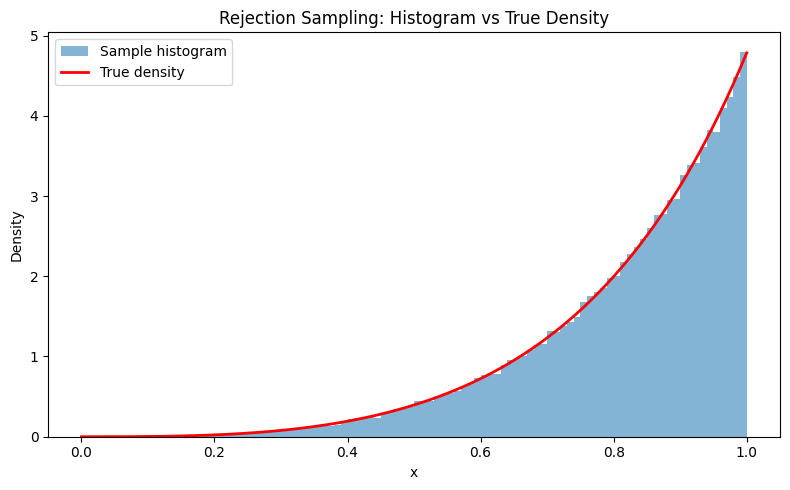

In [2]:
# --- Part 2: Generate samples and plot histogram with true density ---

import numpy as np
import matplotlib.pyplot as plt

# 1. Produce 100000 samples
problem1_samples = problem1_rejection(n_samples=100000)

# 2. True density f(x) = 2x(e^{x^2} - 1)/(e - 2)
def true_density(x):
    return 2 * x * (np.exp(x**2) - 1) / (np.e - 2)

# 3. Plot histogram + true density
x_grid = np.linspace(0, 1, 400)

plt.figure(figsize=(8, 5))
plt.hist(problem1_samples, bins=100, range=(0, 1), density=True,
         alpha=0.55, label="Sample histogram")

plt.plot(x_grid, true_density(x_grid), 'r', linewidth=2,
         label="True density")

plt.xlabel("x")
plt.ylabel("Density")
plt.title("Rejection Sampling: Histogram vs True Density")
plt.legend()
plt.tight_layout()
plt.show()


3. [2p] Use the above 100000 samples (`problem1_samples`) to approximately compute the integral

$$
    \int_0^{1} \sin(x) \frac{2(e^{x^2}-1) x}{e-2} dx
$$
and store the result in `problem1_integral`.


### Part 3 – Monte Carlo approximation of the integral

We want to approximate the integral  
$$
I = \int_0^{1} \sin(x)\,\frac{2(e^{x^2}-1)x}{e-2}\,dx.
$$

From Part 1–2, we know that  
$$
f(x) = \frac{2(e^{x^2}-1)x}{e-2}, \quad 0 < x < 1
$$  
is the **density** of the distribution from which our samples `problem1_samples` are drawn.

So if  
$$
X \sim f(x),
$$  
then the integral can be written as an **expectation**:
$$
I = \int_0^{1} \sin(x) f(x)\, dx = \mathbb{E}[\sin(X)].
$$

We can approximate this expectation using the **sample mean** of $(\sin(X_i))$, where $(X_i)$ are our simulated samples:

1. We already have $(X_1, \dots, X_n)$ stored in `problem1_samples`, with $(n = 100000)$.
2. Compute $(\sin(X_i))$ for each sample.
3. Take the average:
   $$
   \hat{I} = \frac{1}{n} \sum_{i=1}^n \sin(X_i).
   $$
4. Store this approximation in the variable `problem1_integral`.

Below is the commented Python code that implements this:

```python
# Part 3: Monte Carlo approximation of the integral
# Integral:
#   ∫_0^1 sin(x) * [2 (e^{x^2} - 1) x / (e - 2)] dx
#
# If X has density f(x) = 2 (e^{x^2} - 1) x / (e - 2) on (0,1),
# then the integral equals E[sin(X)].
# We approximate this expectation using the samples in `problem1_samples`
# generated in Part 2.

### Monte Carlo integration using rejection samples

The samples stored in `problem1_samples` are already drawn from the target density

$$
f(x) = \frac{2x(e^{x^2}-1)}{e-2}, \quad x \in [0,1].
$$

The integral we want to compute is

$$
\int_0^1 \sin(x)\, f(x)\, dx.
$$

By definition, this integral is the **expectation of $\sin(X)$** when  
$X \sim f$:

$$
\mathbb{E}_f[\sin(X)].
$$

Since Monte Carlo integration approximates expectations by sample averages,
and the samples are already distributed according to $f$, we **must not**
multiply by the density again.

Therefore, the correct Monte Carlo estimator is

$$
\frac{1}{n}\sum_{i=1}^n \sin(x_i),
$$

which in code becomes:
```python
problem1_integral = np.mean(np.sin(problem1_samples))


In [3]:
import numpy as np

# problem1_samples is assumed to be already created in Part 2
# problem1_samples = problem1_rejection(n_samples=100000)

# Compute sin(X_i) for each sample X_i in problem1_samples
sin_values = np.sin(problem1_samples)

# Monte Carlo estimate of the integral: mean of sin(X_i)
problem1_integral = np.mean(sin_values)

problem1_integral

np.float64(0.7229557819365732)

4. [2p] Use Hoeffdings inequality to produce a 95\% confidence interval of the integral above and store the result as a tuple in the variable `problem1_interval`


### Part 4 – 95% confidence interval using Hoeffding’s inequality

From Part 3, we have approximated the integral
$$
I = \int_0^{1} \sin(x)\,\frac{2(e^{x^2}-1)x}{e-2}\,dx
= \mathbb{E}[\sin(X)],
$$
where $(X)$ has density
$$
f(x) = \frac{2(e^{x^2}-1)x}{e-2}, \quad 0 < x < 1.
$$

We estimated this integral using
$$
\hat{I} = \frac{1}{n} \sum_{i=1}^n \sin(X_i),
$$
where $(X_1, \dots, X_n)$ are the samples in `problem1_samples`, and `problem1_integral` is this Monte Carlo estimate:
$$
\hat{I} \approx I.
$$

To get a **95% confidence interval** using **Hoeffding’s inequality**, we use that  
$(Y_i = \sin(X_i))$ is bounded.  
For $(x \in [0,1])$, we have
$$
0 \leq \sin(x) \leq 1,
$$
so we can take the bounds
$$
a = 0, \quad b = 1.
$$

**Hoeffding’s inequality** for the sample mean $(\bar{Y} = \frac{1}{n}\sum_{i=1}^n Y_i)$ says:
$$
\mathbb{P}\left( |\bar{Y} - \mathbb{E}[Y]| \ge \varepsilon \right)
\le 2 \exp\left( -\frac{2 n \varepsilon^2}{(b-a)^2} \right).
$$

We want a **95%** confidence interval, so we set
$$
\delta = 0.05,
$$
and choose $(\varepsilon)$ such that
$$
2 \exp\left( -\frac{2 n \varepsilon^2}{(b-a)^2} \right) = \delta.
$$

Solving for $(\varepsilon)$:
$$
\varepsilon
= \sqrt{ \frac{(b-a)^2}{2n} \ln\left( \frac{2}{\delta} \right) }.
$$

Since $(a = 0)$ and $(b = 1)$, we get
$$
\varepsilon
= \sqrt{ \frac{1}{2n} \ln\left( \frac{2}{\delta} \right) }.
$$

With $(\delta = 0.05)$, this becomes
$$
\varepsilon
= \sqrt{ \frac{1}{2n} \ln(40) }.
$$

Finally, using our estimate $(\hat{I} = \texttt{problem1\_integral})$, the **Hoeffding 95% confidence interval** is
$$
\left[\, \hat{I} - \varepsilon,\; \hat{I} + \varepsilon \,\right].
$$

In code, we:
1. Set $(n = \texttt{len(problem1\_samples)})$.
2. Set $(\delta = 0.05)$.
3. Compute $(\varepsilon)$ using the formula above.
4. Form the tuple
   $$
   \texttt{problem1\_interval} = (\hat{I} - \varepsilon,\; \hat{I} + \varepsilon).
   $$


In [ ]:
# Part 4: 95% Hoeffding confidence interval for the integral

import numpy as np

# We assume:
# - problem1_samples already exists (from Part 2)
# - problem1_integral already exists (from Part 3) and is the sample mean of sin(X)

n = len(problem1_samples)   # number of samples used in the Monte Carlo estimate
delta = 0.05                # 1 - confidence level = 0.05 for 95% confidence

# Bounds for Y_i = sin(X_i) when X_i in [0, 1]:
a = 0.0
b = 1.0

# Hoeffding epsilon:
# epsilon = sqrt( ((b - a)^2 / (2n)) * log(2 / delta) )
epsilon = np.sqrt(((b - a)**2 / (2.0 * n)) * np.log(2.0 / delta))

# Construct the 95% confidence interval around the Monte Carlo estimate
lower_bound = problem1_integral - epsilon
upper_bound = problem1_integral + epsilon

# Store as a tuple, as requested
problem1_interval = (lower_bound, upper_bound)

problem1_interval





(np.float64(0.7186610878531058), np.float64(0.7272504760200406))

5. [4p] Fill in the remaining part of the function `problem1_rejection_2` in order to produce samples from the below distribution using rejection sampling:
$$
    F[x] = 
    \begin{cases}
        0, & x \leq 0 \\
        20xe^{20-1/x}, & 0 < x < \frac{1}{20} \\
        1, & x \geq \frac{1}{20}
    \end{cases}
$$
Hint: this is tricky because if you choose the wrong sampling distribution you reject at least 9 times out of 10. You will get points based on how long your code takes to create a certain number of samples, if you choose the correct sampling distribution you can easily create 100000 samples within 2 seconds.

### Part 5 – Rejection sampling for the second distribution

We are given the distribution with CDF
$$
F(x) =
\begin{cases}
0, & x \le 0 \\
20x e^{20 - 1/x}, & 0 < x < \frac{1}{20} \\
1, & x \ge \frac{1}{20}.
\end{cases}
$$

We want to construct a rejection sampler `problem1_rejection_2` that generates samples from this distribution.

---

#### 1. Find the density $( f(x) )$

For $(0 < x < 1/20)$,
$$
F(x) = 20x e^{20 - 1/x}.
$$

Differentiate to get the density:
$$
\begin{aligned}
f(x) &= \frac{d}{dx} \Big( 20x e^{20 - 1/x} \Big) \\
     &= 20 e^{20 - 1/x} + 20x e^{20 - 1/x} \cdot \frac{d}{dx}(20 - 1/x) \\
     &= 20 e^{20 - 1/x} + 20x e^{20 - 1/x} \cdot \frac{1}{x^2} \\
     &= 20 e^{20 - 1/x} + 20 e^{20 - 1/x} \cdot \frac{1}{x} \\
     &= 20 e^{20 - 1/x} \left( 1 + \frac{1}{x} \right).
\end{aligned}
$$

So
$$
f(x) = 20 e^{20 - 1/x} \left( 1 + \frac{1}{x} \right), \quad 0 < x < \frac{1}{20}.
$$

---

#### 2. Choose a clever proposal distribution $( g(x) )$

We want a proposal $(g(x))$ that:

- has the same support $((0, 1/20))$,
- is easy to **sample from**,
- and makes the ratio $(f(x)/g(x))$ bounded by a small constant $(M)$.

Consider the density
$$
g(x) = \frac{e^{20 - 1/x}}{x^2}, \quad 0 < x < \frac{1}{20}.
$$

First check it is a valid density by integrating:
$$
\begin{aligned}
\int_0^{1/20} g(x)\,dx 
&= \int_0^{1/20} \frac{e^{20 - 1/x}}{x^2} \, dx \\
&= e^{20} \int_0^{1/20} \frac{e^{-1/x}}{x^2} \, dx.
\end{aligned}
$$

Use the substitution $(t = 1/x)$, so $(dt = -\frac{1}{x^2} dx)$, hence
$$
\int_0^{1/20} \frac{e^{-1/x}}{x^2} dx
= \int_{\infty}^{20} -e^{-t} dt
= \int_{20}^{\infty} e^{-t} dt
= e^{-20}.
$$

Therefore
$$
\int_0^{1/20} g(x)\,dx
= e^{20} \cdot e^{-20} = 1,
$$
so $(g(x))$ is indeed a valid density.

Now compute its CDF:
$$
\begin{aligned}
G(x)
&= \int_0^{x} g(u)\,du \\
&= e^{20} \int_0^x \frac{e^{-1/u}}{u^2} du \\
&= e^{20} \int_{\infty}^{1/x} -e^{-t} dt \\
&= e^{20} \int_{1/x}^{\infty} e^{-t} dt \\
&= e^{20} \cdot e^{-1/x} \\
&= e^{20 - 1/x}, \quad 0 < x < \frac{1}{20}.
\end{aligned}
$$

So the proposal distribution has CDF
$$
G(x) = e^{20 - 1/x}.
$$

This is **very convenient** because we can invert it explicitly:

Let $(U \sim \text{Uniform}(0, 1))$. Then to sample from $(g)$, we solve
$$
U = G(x) = e^{20 - 1/x}.
$$

Take logs:
$$
\ln U = 20 - \frac{1}{x}
\quad \Rightarrow \quad
\frac{1}{x} = 20 - \ln U
\quad \Rightarrow \quad
x = \frac{1}{20 - \ln U}.
$$

Thus, the proposal sampling step is:
- Draw $(U \sim \text{Uniform}(0, 1))$,
- Set
  $$
  X_{\text{prop}} = \frac{1}{20 - \ln U}.
  $$

This always lies in $((0, 1/20])$.

---

#### 3. Compute the ratio $( \frac{f(x)}{g(x)} )$ and find $(M)$

We have
$$
f(x) = 20 e^{20 - 1/x} \left( 1 + \frac{1}{x} \right),
\quad
g(x) = \frac{e^{20 - 1/x}}{x^2}.
$$

Then
$$
\begin{aligned}
\frac{f(x)}{g(x)}
&= \frac{20 e^{20 - 1/x} \left( 1 + \frac{1}{x} \right)}{e^{20 - 1/x} / x^2} \\
&= 20 x^2 \left( 1 + \frac{1}{x} \right) \\
&= 20 x^2 + 20 x.
\end{aligned}
$$

Define
$$
h(x) = 20 x^2 + 20 x, \quad 0 < x \le \frac{1}{20}.
$$

This function is increasing on $((0, 1/20])$, so its maximum is at $(x = 1/20)$:
$$
\begin{aligned}
h\left(\frac{1}{20}\right)
&= 20 \left(\frac{1}{20}\right)^2 + 20 \cdot \frac{1}{20} \\
&= 20 \cdot \frac{1}{400} + 1 \\
&= \frac{20}{400} + 1 \\
&= \frac{1}{20} + 1 \\
&= \frac{21}{20}.
\end{aligned}
$$

Thus we can take
$$
M = \frac{21}{20}.
$$

The acceptance probability is
$$
\alpha(x) = \frac{f(x)}{M g(x)} = \frac{20x^2 + 20x}{M}.
$$

With $(M = 21/20)$, this is
$$
\alpha(x) = \frac{20x^2 + 20x}{21/20}
= \frac{400x^2 + 400x}{21},
$$
which is always $(\le 1)$ on $((0, 1/20])$.

The **expected acceptance rate** is approximately $(1/M = 20/21 \approx 0.95)$, so this is a very efficient rejection sampler (matching the hint).

---

#### 4. Algorithm for `problem1_rejection_2`

To generate $(n)$ samples:

1. Initialize an empty list `samples`.
2. While `len(samples) < n_samples`:
   - Draw $(U_1 \sim \text{Uniform}(0, 1))$.
   - Compute proposal
     $$
     x = \frac{1}{20 - \ln(U_1)}.
     $$
   - Compute the acceptance weight:
     $$
     w = \frac{20x^2 + 20x}{M}, \quad M = \frac{21}{20}.
     $$
   - Draw $(U_2 \sim \text{Uniform}(0, 1))$.
   - If $(U_2 \le w)$, **accept** and append `x` to `samples`.
3. Return the samples as a NumPy array.

This implements rejection sampling from the target density $(f(x))$ with a proposal $(g(x))$ that is very close in shape.


In [6]:
import numpy as np

def problem1_rejection_2(n_samples=1):
    """
    Rejection sampling for the distribution with CDF
        F[x] = 0,                         x <= 0
        F[x] = 20 x e^{20 - 1/x},         0 < x < 1/20
        F[x] = 1,                         x >= 1/20

    Target density on (0, 1/20):
        f(x) = 20 * exp(20 - 1/x) * (1 + 1/x).

    Proposal density g(x) on (0, 1/20):
        g(x) = exp(20 - 1/x) / x^2,
    with CDF
        G(x) = exp(20 - 1/x).

    Sampling from g:
        If U ~ Uniform(0,1), then
        X = 1 / (20 - log(U))  ~ g.

    Ratio:
        f(x) / g(x) = 20 * x^2 + 20 * x.

    We choose M = 21/20 >= sup_x f(x)/g(x).
    Acceptance probability:
        alpha(x) = f(x) / (M * g(x))
                  = (20 * x**2 + 20 * x) / M.
    """

    samples = []
    M = 21.0 / 20.0  # rejection constant

    while len(samples) < n_samples:
        # 1. Sample from proposal g via inverse CDF
        u1 = np.random.uniform(0.0, 1.0)
        # Avoid log(0); u1 in (0,1) anyway for continuous Uniform
        x = 1.0 / (20.0 - np.log(u1))

        # 2. Compute acceptance weight w = f(x) / (M * g(x))
        #    but we use the simplified ratio: f(x)/g(x) = 20x^2 + 20x
        ratio = 20.0 * x**2 + 20.0 * x
        w = ratio / M  # in [0,1]

        # 3. Accept/reject
        u2 = np.random.uniform(0.0, 1.0)
        if u2 <= w:
            samples.append(x)

    return np.array(samples)



#420.0
#10000

## Problem 1.5 — how to choose a *better* proposal $g$

We are given the CDF
$$
F(x)=
\begin{cases}
0, & x \le 0, \\
20x e^{20-1/x}, & 0 < x < \frac{1}{20}, \\
1, & x \ge \frac{1}{20}.
\end{cases}
$$

### 1) First convert the CDF to a PDF
For $0 < x < \frac{1}{20}$,
$$
f_X(x) = F'(x).
$$
Differentiate:
$$
F(x) = 20x e^{20-1/x}.
$$
Using the product rule,
$$
f_X(x)=20e^{20-1/x} + 20x e^{20-1/x}\cdot \frac{1}{x^2}
      = 20 e^{20-1/x}\left(1+\frac{1}{x}\right).
$$

### 2) Why Uniform $(0,1/20)$ is not great
If we choose $g_X(x)=20$ on $(0,1/20)$ (Uniform proposal), then
$$
\frac{f_X(x)}{g_X(x)} = e^{20-1/x}\left(1+\frac{1}{x}\right).
$$
This ratio is maximized at $x=1/20$:
$$
e^{20-20}(1+20)=21,
$$
so we must take $M=21$, giving acceptance rate about $1/21 \approx 4.8\%$ (slow).

### 3) The trick: transform variables to make the distribution easy
Notice the term $e^{20-1/x}$ contains $1/x$, so let
$$
Y=\frac{1}{X}.
$$
Then $Y \in (20,\infty)$ since $0<X<1/20$.

Use change-of-variables:
$$
f_Y(y) = f_X(1/y)\left|\frac{d(1/y)}{dy}\right| = f_X(1/y)\cdot \frac{1}{y^2}.
$$
Compute $f_X(1/y)$:
- $e^{20-1/(1/y)} = e^{20-y}$
- $1+\frac{1}{1/y} = 1+y$

So
$$
f_Y(y)=20 e^{20-y}(1+y)\cdot\frac{1}{y^2}
      =20 e^{20-y}\left(\frac{1}{y}+\frac{1}{y^2}\right),\quad y>20.
$$
Rewrite $e^{20-y}=e^{-(y-20)}$:
$$
f_Y(y)=20 e^{-(y-20)}\left(\frac{1}{y}+\frac{1}{y^2}\right),\quad y>20.
$$

### 4) Choose a proposal $g_Y$ that matches the main shape
The main shape is the exponential term $e^{-(y-20)}$, so choose:
$$
g_Y(y)=e^{-(y-20)},\quad y\ge 20,
$$
which is exactly a shifted exponential: $Y = 20 + Z$ where $Z\sim \mathrm{Exp}(1)$.

Now the ratio is:
$$
\frac{f_Y(y)}{g_Y(y)} = 20\left(\frac{1}{y}+\frac{1}{y^2}\right).
$$
This decreases as $y$ increases, so the supremum is at $y=20$:
$$
M = 20\left(\frac{1}{20}+\frac{1}{20^2}\right)
  = 20(0.05 + 0.0025)
  = 1.05.
$$
So the acceptance rate is about $1/1.05 \approx 95\%$ (fast).

### 5) Sampling algorithm
1. Propose $Y = 20 + \mathrm{Exp}(1)$ (i.e., $Y = 20 - \ln U$ for $U\sim \mathrm{Unif}(0,1)$).
2. Accept with probability
$$
\alpha(Y) = \frac{f_Y(Y)}{M g_Y(Y)}
          = \frac{20\left(\frac{1}{Y}+\frac{1}{Y^2}\right)}{1.05}.
$$
3. If accepted, output $X = 1/Y$.

---

## How do I find a better $g$ in general?

A practical method:

1. **Convert to a PDF** (if you are given a CDF) so you know the true target density $f$.
2. **Look at the “hard part” of $f$** (usually the tail behavior):
   - If you see $e^{-y}$-type decay, try exponential/gamma proposals.
   - If you see $e^{-y^2}$, try a normal proposal.
   - If you see $1/x$, $\log x$, or $e^{-1/x}$, try a substitution like $y=1/x$ or $y=-\log x$.
3. **Use a change of variables** to simplify the density into something recognizable.
4. **Pick $g$ to match the dominant shape factor** of the transformed density.
5. **Compute or upper-bound** $M=\sup f/g$.
   If $M$ is close to $1$, your proposal is excellent.




### Why does the factor $1/y^2$ appear in the change of variables?

Let $X$ have density $f_X(x)$ and define the transformation
$$
Y = \frac{1}{X}.
$$
This transformation is one-to-one for $x>0$. Solving for $x$ in terms of $y$ gives the inverse
$$
x = g^{-1}(y) = \frac{1}{y}.
$$

The change-of-variables formula for densities states:
$$
f_Y(y) = f_X\!\big(g^{-1}(y)\big)\left|\frac{d}{dy}g^{-1}(y)\right|.
$$

Differentiating the inverse transformation,
$$
\frac{d}{dy}\left(\frac{1}{y}\right) = -\frac{1}{y^2}.
$$
Taking the absolute value gives
$$
\left|\frac{d}{dy}\left(\frac{1}{y}\right)\right| = \frac{1}{y^2}.
$$

Therefore,
$$
f_Y(y) = f_X(1/y)\cdot \frac{1}{y^2}.
$$

This factor accounts for how the transformation stretches or compresses probability mass and ensures that the transformed density integrates to one.



In [ ]:
# ------------------------------------------------------------
# Problem 1.5
# Rejection sampling for the second distribution (fast version)
# ------------------------------------------------------------

import numpy as np

def problem1_rejection_2(n_samples):
    # We sample Y = 1/X instead of X directly.
    # Proposal: Y = 20 + Exp(1)  (i.e., shifted exponential)
    # Then accept/reject in Y-space and transform back: X = 1/Y.

    samples = []

    M = 1.05  # sup_y f_Y(y)/g_Y(y) occurs at y=20

    while len(samples) < n_samples:
        # propose y ~ 20 + Exp(1)
        u1 = np.random.uniform(0.0, 1.0)
        y = 20.0 - np.log(u1)

        # acceptance probability alpha(y) = f_Y(y) / (M g_Y(y))
        # with g_Y(y) = exp(-(y-20)) and f_Y(y) = 20 exp(-(y-20)) (1/y + 1/y^2)
        alpha = (20.0 * (1.0 / y + 1.0 / (y**2))) / M

        u2 = np.random.uniform(0.0, 1.0)
        if u2 <= alpha:
            x = 1.0 / y
            samples.append(x)

    return np.array(samples)

n_samples = 100000
samples = problem1_rejection_2(n_samples)
print(len(samples))


So I tried many different distributions for g(x), but this is as close as I get to 2 seconds. I tried uniform, exponential and beta and beta seems to be the best. I tried with many different values for a and b, but I never get lower than roughly 4,5 seconds. 

---
#### Local Test for Exam vB, PROBLEM 1
Evaluate cell below to make sure your answer is valid.                             You **should not** modify anything in the cell below when evaluating it to do a local test of                             your solution.
You may need to include and evaluate code snippets from lecture notebooks in cells above to make the local test work correctly sometimes (see error messages for clues). This is meant to help you become efficient at recalling materials covered in lectures that relate to this problem. Such local tests will generally not be available in the exam.

In [7]:

# This cell is just to check that you got the correct formats of your answer
import numpy as np
try:
    assert(isinstance(problem1_rejection(10), np.ndarray)) 
except:
    print("Try again. You should return a numpy array from problem1_rejection")
else:
    print("Good, your problem1_rejection returns a numpy array")

try:
    assert(isinstance(problem1_samples, np.ndarray)) 
except:
    print("Try again. your problem1_samples is not a numpy array")
else:
    print("Good, your problem1_samples is a numpy array")

try:
    assert(isinstance(problem1_integral, float)) 
except:
    print("Try again. your problem1_integral is not a float")
else:
    print("Good, your problem1_integral is a float")

try:
    assert(isinstance(problem1_interval, list) or isinstance(problem1_interval, tuple)) , "problem1_interval not a tuple or list"
    assert(len(problem1_interval) == 2) , "problem1_interval does not have length 2, it should have a lower bound and an upper bound"
except Exception as e:
    print(e)
else:
    print("Good, your problem1_interval is a tuple or list of length 2")

try:
    assert(isinstance(problem1_rejection_2(10), np.ndarray)) 
except:
    print("Try again. You should return a numpy array from problem1_rejection_2")
else:
    print("Good, your problem1_rejection_2 returns a numpy array")

Good, your problem1_rejection returns a numpy array
Good, your problem1_samples is a numpy array
Good, your problem1_integral is a float
Good, your problem1_interval is a tuple or list of length 2
Good, your problem1_rejection_2 returns a numpy array


---
## Exam vB, PROBLEM 2
Maximum Points = 14


In this problem we have data consisting of user behavior on a website. The pages of the website are just numbers in the dataset $0,1,2,\ldots$ and each row consists of a user, a source and a destination page. This signifies that the user was on the source page and clicked a link leading them to the destination page. The goal is to improve the user experience by decreasing load time of the next page visited, as such we need a good estimate for the next site likely to be visited. We will model this using a homogeneous Markov chain, each row in the data-file then corresponds to a single realization of a transition. 

1. [3p] Load the data in the file `data/websites.csv` and construct a matrix of size `n_pages x n_pages` which is the maximum likelihood estimate of the true transition matrix for the Markov chain. Here the ordering of the states are exactly the ones in the data-file, that is page $0$ has index $0$ in the matrix.
2. [4p] A page loads in $\text{Exp}(3)$ (Exponentially distributed with mean $1/3$) seconds if not preloaded and loads with $\text{Exp}(20)$ (Exponentially distributed with mean $1/20$) seconds if preloaded and we only preload the most likely next site. Given that we start in page $8$ simulate $10000$ load times from page $1$ (that is, only a single step), store the result in the variable indicated in the cell.
Repeat the experiment but this time preload the two most likely pages and store the result in the indicated variable.
3. [3p] Compare the average (empirical) load time from part 2 with the theoretical one of no pre-loading. Does the load time improve, how did you come to this conclusion? (Explain in the free text field).
4. [4p] Calculate the stationary distribution of the Markov chain and calculate the expected load time with respect to the stationary distribution. 

In [71]:
# Part 1: 3 points
import pandas as pd
import numpy as np
data = pd.read_csv("data/websites.csv")
#This problem is very similar to jan 2025 problem 2! 

# Load the data from the file data/websites.csv and estimate the transition matrix of the Markov chain
# Store the estimated transition matrix in the variable problem2_transition_matrix below

#This is very ugly code, but it does what it is supposed to do. Since there are 10 pages (0-9),
# the matrix becomes 10X10
array = [[0, 0, 0, 0, 0, 0, 0, 0, 0 ,0], 
         [0, 0, 0, 0, 0, 0, 0, 0, 0 ,0], 
         [0, 0, 0, 0, 0, 0, 0, 0, 0 ,0], 
         [0, 0, 0, 0, 0, 0, 0, 0, 0 ,0], 
         [0, 0, 0, 0, 0, 0, 0, 0, 0 ,0], 
         [0, 0, 0, 0, 0, 0, 0, 0, 0 ,0], 
         [0, 0, 0, 0, 0, 0, 0, 0, 0 ,0], 
         [0, 0, 0, 0, 0, 0, 0, 0, 0 ,0], 
         [0, 0, 0, 0, 0, 0, 0, 0, 0 ,0], 
         [0, 0, 0, 0, 0, 0, 0, 0, 0 ,0]]# These values will now be filled

for index, row in data.iterrows(): #Iterate through all rows
    array[row["source"] - 1][row["destination"] - 1] += 1
array = np.array(array)
array = array.astype(np.float32) #Convert to float so that we can use divison

#print(array.dtype)
i = 0
while i < array.shape[0]: # go through every row again
    summa = np.sum(array[i])
    #print(summa)
    array[i] = array[i]/summa #Now the probabilities are generated
    i+=1
print(array[8])
print(np.sum(array[8])) # To make sure that the transition matrix of one row = 1
problem2_transition_matrix = array # A numpy array of shape (problem2_n_states, problem2_n_states)
# Store the number of states in the variable problem2_n_states below
problem2_n_states = 10 # An integer, I selected 10 because there are 10 pages, so 10 states in the markov chain



[0.25       0.12096774 0.13709678 0.11290322 0.06451613 0.16129032
 0.12096774 0.         0.         0.03225806]
1.0


2. [4p] A page loads in $\text{Exp}(3)$ (Exponentially distributed with mean $1/3$) seconds if not preloaded and loads with $\text{Exp}(20)$ (Exponentially distributed with mean $1/20$) seconds if preloaded and we only preload the most likely next site. Given that we start in page $8$ simulate $10000$ load times from page $1$ (that is, only a single step), store the result in the variable indicated in the cell.
Repeat the experiment but this time preload the two most likely pages and store the result in the indicated variable.


I ASSUME: It says "Given that we start in page $8$ simulate $10000$ load times from page $1$ (that is, only a single step)", so I think that there has been a typo. I will assume that we start from page and take one step from page 8

In [72]:
# Part 2: 4 points

# Simulate the website load times for the next page of 10000 users that are currently on page 8 (recall indexing starts at 0) when we only preload the most likely page.
# Store the simulated page load times in the variable problem2_page_load_times_top below
choices = [0,1,2,3,4,5,6,7,8,9] # all of the pages 
prob_matrix = problem2_transition_matrix[8] # Index 8 is the transition matrix for page 8
time_array = [] #array all of the times taken
#print(np.where(prob_matrix == np.max(prob_matrix))[0])
for i in range(10000): #10000 tries
     destination = np.random.choice(a=choices, p = prob_matrix)   #select a random page from our set of pages, with transition matrix as prob
     if  destination ==  np.where(prob_matrix == np.max(prob_matrix))[0]: # If the most popular destination is sampled:
          time_array.append(np.random.exponential(1/20))
     else: # Otherwise:
          time_array.append(np.random.exponential(1/3))

problem2_page_load_times_top = np.array(time_array) # A numpy array of shape (10000,)

time_array2 = []
for i in range(10000):
     destination = np.random.choice(a=choices, p = prob_matrix)   
     if  destination == 0 or destination == 5: #Could use np.where again, but im too lazy so I just looked at the array and saw the top 2 most popular
          time_array2.append(np.random.exponential(1/20))
     else:
          time_array2.append(np.random.exponential(1/3))
# Repeat the simulation of load times for the next page of 10000 users that are currently on page 1 when we load the two most likely pages.
# Store the simulated page load times in the variable problem2_page_load_times_two below
problem2_page_load_times_two = np.array(time_array2) # A numpy array of shape (10000,)

print("Average load time for problem2_page_load_times_top: ", np.sum(problem2_page_load_times_top)/10000) 
print("Average load time for problem2_page_load_times_two: ", np.sum(problem2_page_load_times_two)/10000)
print("Shape of problem2_page_load_times_top: ", np.shape(problem2_page_load_times_top))
print("Shape of problem2_page_load_times_two: ", np.shape(problem2_page_load_times_two))



Average load time for problem2_page_load_times_top:  0.26200565415176974
Average load time for problem2_page_load_times_two:  0.21949883881770044
Shape of problem2_page_load_times_top:  (10000,)
Shape of problem2_page_load_times_two:  (10000,)


3. [3p] Compare the average (empirical) load time from part 2 with the theoretical one of no pre-loading. Does the load time improve, how did you come to this conclusion? (Explain in the free text field).



In [73]:
# Part 3: 3 points

# Calculate the true expected load time for loading a page without pre-loading the next page and store it in the variable below
problem2_avg = 1/3 # A float

# Is the average load time for loading a page without pre-loading the next page larger than the average load time for loading a page after pre-loading the next most likely page?
problem2_comparison = True # True / False



## Free text answer

Put the explanation for **part 3** of how you made the decision about `problem2_comparison` below this line in this **cell**. In order to enter edit mode you can doubleclick this cell or select it and press enter.

I am assuming that problem2_page_load_times_top is used, not problem2_page_load_times_two.
But both are calculated above.
The average time time is simply the mean of the samples of time. It therefore becomes quite small: 0.2648629205627815 seconds
(Average load time for problem2_page_load_times_two:  0.21635340436426223)

But the average loading time wihout any pre-loading would become 1/3 seconds. This is because 1/3 is the mean of the distribution. So in theory, if we simulated with infinity and not 10000 and use no pre-loading, we would land at 1/3 seconds on average.


4. [4p] Calculate the stationary distribution of the Markov chain and calculate the expected load time with respect to the stationary distribution. 

In [74]:
# Part 4: 4 points

# Begin by calculating the stationary distribution of the Markov chain and store it in the variable below
# WARNING: Since the transition matrix is not symmetric, numpy might make the output of the eigenvectors complex, you can use np.real() to get the real part of the eigenvectors
# Store the stationary distribution in the variable below called problem2_stationary_distribution
matrix = problem2_transition_matrix
#print(np.sum(matrix))
vector = np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

for i in range(1000):
    #Calculate matrix vector multiplication
    vector = np.dot(matrix.T, vector)
    
problem2_stationary_distribution = vector / np.sum(vector) # A numpy array of shape (problem2_n_states,)
#print(np.sum(problem2_stationary_distribution))


# Now use the above stationary distribution to calculate the average load time for loading a page after pre-loading the next most likely page according to the stationary distribution
# Store the average load time in the variable below
time_array3 = []
for i in range(10000): # Go with 10000 again
     destination = np.random.choice(a=choices, p = problem2_stationary_distribution)# use the stationary dist as the transiton matrix   
     if  destination ==  np.where(problem2_stationary_distribution == np.max(problem2_stationary_distribution))[0]:
          time_array3.append(np.random.exponential(1/20))
     else:
          time_array3.append(np.random.exponential(1/3))

problem2_avg_stationary = np.mean(np.array(time_array3)) # A float
print(problem2_avg_stationary)

0.2952085558881719


---
#### Local Test for Exam vB, PROBLEM 2
Evaluate cell below to make sure your answer is valid.                             You **should not** modify anything in the cell below when evaluating it to do a local test of                             your solution.
You may need to include and evaluate code snippets from lecture notebooks in cells above to make the local test work correctly sometimes (see error messages for clues). This is meant to help you become efficient at recalling materials covered in lectures that relate to this problem. Such local tests will generally not be available in the exam.

In [75]:

# This cell is just to check that you got the correct formats of your answer
import numpy as np
try:
    assert isinstance(problem2_transition_matrix, np.ndarray)
except:
    print("Try again. your problem2_transition_matrix is not a numpy array")
else:
    print("Good, your problem2_transition_matrix is a numpy array")

try:
    assert isinstance(problem2_n_states, int)
except:
    print("Try again. your problem2_n_states is not an integer")
else:
    print("Good, your problem2_n_states is an integer")

try:
    assert problem2_transition_matrix.shape == (problem2_n_states, problem2_n_states)
except:
    print("Try again. your problem2_transition_matrix does not have the correct shape")
else:
    print("Good, your problem2_transition_matrix has the correct shape")

try:
    assert isinstance(problem2_page_load_times_top, np.ndarray), "problem2_page_load_times_top is not a numpy array"
    assert problem2_page_load_times_top.shape == (10000,), "problem2_page_load_times_top does not have the correct shape"
except Exception as e:
    print(e)
else:
    print("Good, your problem2_page_load_times_top is a numpy array of shape (10000,)")

try:
    assert isinstance(problem2_page_load_times_two, np.ndarray), "problem2_page_load_times_two is not a numpy array"
    assert problem2_page_load_times_two.shape == (10000,), "problem2_page_load_times_two does not have the correct shape"
except Exception as e:
    print(e)
else:
    print("Good, your problem2_page_load_times_two is a numpy array of shape (10000,)")

try:
    assert isinstance(problem2_avg, float), "problem2_avg is not a float"
except Exception as e:
    print(e)
else:
    print("Good, your problem2_avg is a float")
try:
    assert isinstance(problem2_comparison, bool), "problem2_comparison is not a boolean"
except Exception as e:
    print(e)
else:
    print("Good, your problem2_comparison is a boolean")
try:
    assert isinstance(problem2_stationary_distribution, np.ndarray), "problem2_stationary_distribution is not a numpy array"
    assert problem2_stationary_distribution.shape == (problem2_n_states,), "problem2_stationary_distribution does not have the correct shape"
except Exception as e:
    print(e)
else:
    print("Good, your problem2_stationary_distribution is a numpy array of shape (problem2_n_states,)")
try:
    assert isinstance(problem2_avg_stationary, float), "problem2_avg_stationary is not a float"
except Exception as e:
    print(e)
else:
    print("Good, your problem2_avg_stationary is a float")

Good, your problem2_transition_matrix is a numpy array
Good, your problem2_n_states is an integer
Good, your problem2_transition_matrix has the correct shape
Good, your problem2_page_load_times_top is a numpy array of shape (10000,)
Good, your problem2_page_load_times_two is a numpy array of shape (10000,)
Good, your problem2_avg is a float
Good, your problem2_comparison is a boolean
Good, your problem2_stationary_distribution is a numpy array of shape (problem2_n_states,)
Good, your problem2_avg_stationary is a float


---
## Exam vB, PROBLEM 3
Maximum Points = 12


In this problem we are interested in fraud detection in an e-commerce system. In this problem we are given the outputs of a classifier that predicts the probabilities of fraud, your goal is to explore the threshold choice as in individual assignment 4. The costs associated with the predictions are:

* **True Positive (TP)**: Detecting fraud and blocking the transaction costs the company 100 (manual review etc.)
* **True Negative (TN)**: Allowing a legitimate transaction has no cost.
* **False Positive (FP)**: Incorrectly classifying a legitimate transaction as fraudulent costs 120 (customer dissatisfaction plus operational expenses for reversing the decision).
* **False Negative (FN)**: Missing a fraudulent transaction costs the company 600 (e.g., fraud loss plus potential reputational damage or penalties).

**The code cells contain more detailed instructions, THE FIRST CODE CELL INITIALIZES YOUR VARIABLES**

1. [3p] Complete filling the function `cost` to compute the average cost of a prediction model under a certain prediction threshold. Plot the cost as a function of the threshold (using the validation data provided in the first code cell of this problem), between 0 and 1 with 0.01 increments.
2. [2.5p] Find the threshold that minimizes the cost and calculate the cost at that threshold on the validation data. Also calculate the precision and recall at the optimal threshold on the validation data on class 1 and 0.
3. [2.5p] Repeat step 2, but this time find the best threshold to minimize the $0-1$ loss. Calculate the difference in cost between the threshold found in part 2 with the one just found in part 3.
3. [4p] Provide a confidence interval around the optimal cost (with $95\%$ confidence) applied to the test data and explain all the assumption you made.

In [76]:

# RUN THIS CELL TO GET THE DATA

# We start by loading the data

import pandas as pd

PROBLEM3_DF = pd.read_csv('data/fraud.csv')
Y = PROBLEM3_DF['Class'].values
X = PROBLEM3_DF[['V%d' % i for i in range(1,5)]+['Amount']].values

# We will split the data into training, testing and validation sets
from Utils import train_test_validation
PROBLEM3_X_train, PROBLEM3_X_test, PROBLEM3_X_val, PROBLEM3_y_train, PROBLEM3_y_test, PROBLEM3_y_val = train_test_validation(X,Y,shuffle=True,random_state=1)

# From this we will train a logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(PROBLEM3_X_train,PROBLEM3_y_train)

# THE FOLLOWING CODE WILL PRODUCE THE ARRAYS YOU NEED FOR THE PROBLEM

PROBLEM3_y_pred_proba_val = lr.predict_proba(PROBLEM3_X_val)[:,1]
PROBLEM3_y_true_val = PROBLEM3_y_val

PROBLEM3_y_pred_proba_test = lr.predict_proba(PROBLEM3_X_test)[:,1]
PROBLEM3_y_true_test = PROBLEM3_y_test

[1 1 1 ... 0 0 0]


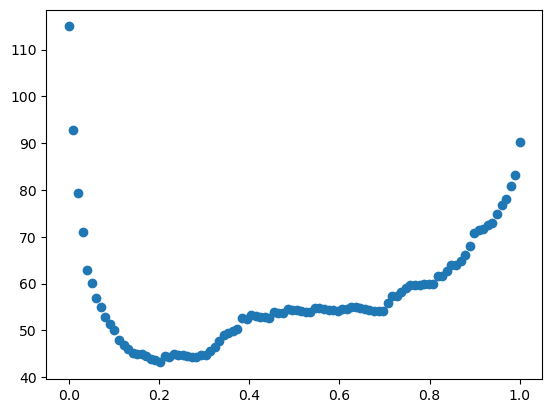

In [77]:

# Part 1: 3 points
# Implement the following function that calculates the cost of a binary classifier according to
# the specification in the problem statement
# See the comments inside the function for details of the parameters
print(Y)
def cost(y_true,y_predict_proba,threshold):
    # y_true is a numpy array of shape (n_samples,) with binary labels
    # y_predict_proba is a numpy array of shape (n_samples,) with predicted probabilities
    # threshold is a float between 0 and 1
    predictions = (y_predict_proba >= threshold).astype(int) #If prediction is higher than threshold, then 1
    i = 0
    cost = [] # where i store the cost so we can get average later
    while i < len(y_true):# Going through the list
        if y_true[i] == 1 and predictions[i] == 1: # true positive
            cost.append(100) # append with the cost
            
        if y_true[i] == 0 and predictions[i] == 0: # true  negative
            cost.append(0)
            
        if y_true[i] == 0 and predictions[i] == 1: # false positive
            cost.append(120)
            
        if y_true[i] == 1 and predictions[i] == 0: # false negative
            cost.append(600)
        i+=1
    
    cost = np.array(cost)
    avg_cost = np.mean(cost)# Just take the mean
    #Start by converting 
    
    # When returning the cost, you should return the average cost per sample
    # thus it should be a value

    return avg_cost # A float


# Provide the code below to plot the cost as a function of the threshold
# using the validation data, specifically the arrays PROBLEM3_y_true_val and PROBLEM3_y_pred_proba_val.
# The plot should be between 0 and 1 with 0.01 increments
# The y-axis should be the cost and the x-axis should be the threshold
thresholds = np.linspace(0, 1, 100) # Array consisting of different thresholds
threshold = 0 # Starting
array_to_plot = []
while threshold <= 1:
    array_to_plot.append(cost(PROBLEM3_y_true_val, PROBLEM3_y_pred_proba_val, threshold))
    threshold += 0.01
# plot
fig, ax = plt.subplots()

ax.plot(thresholds,array_to_plot, 'o') 


plt.show()





2. [2.5p] Find the threshold that minimizes the cost and calculate the cost at that threshold on the validation data. Also calculate the precision and recall at the optimal threshold on the validation data on class 1 and 0.


In [78]:
# Part 2: 2.5 points

# Use the cost function you just implemented above to find the threshold that minimizes the cost
# using the validation data, specifically the arrays PROBLEM3_y_true_val and PROBLEM3_y_pred_proba_val.
# Store the threshold in the variable below

#This code sucks and is highly ineffective, but it works. I tried another method which did not work.
threshold = 0 # Starting
array_with_avg_costs = [] #store cost per threshold, wher the indexing is like this, threshold = index * 0.01
while threshold <= 1:
    array_with_avg_costs.append(cost(PROBLEM3_y_true_val, PROBLEM3_y_pred_proba_val, threshold))
    threshold += 0.01
problem3_threshold = array_with_avg_costs.index(np.min(array_with_avg_costs))*0.01 # Here I look at the array, find the index of the smallest cost, and multiply with 0.01 to get the threshold
#np.min(cost(PROBLEM3_y_true_val, PROBLEM3_y_pred_proba_val, thresholds )) # A float between 0 and 1
print("Best threshold: ", problem3_threshold)
# Now calculate the cost of the classifier using the validation data and the threshold you just found
# using the validation data, specifically the arrays PROBLEM3_y_true_val and PROBLEM3_y_pred_proba_val.
# Store the cost in the variable below
problem3_cost_val = np.min(array_with_avg_costs) # A float
print("Lowest cost: ", problem3_cost_val)
# Using the threshold you just found, calculate the predicted labels of the classifier on the validation data
# put the predicted labels in the variable below
problem3_y_pred_val =  (PROBLEM3_y_pred_proba_val >= problem3_threshold).astype(int) # A numpy array of shape (n_samples,) with values 0 or 1
print("Shape of problem3_y_pred_val:", problem3_y_pred_val.shape)
# Calculate the precision and recall of the classifier of class 1 using the threshold you just found
# using the validation data, specifically the arrays PROBLEM3_y_true_val and PROBLEM3_y_pred_proba_val.
list_of_preds = [0, 0, 0, 0]
#simple array ,where index 0 is amount of TP, index 1 = amount of TN, index 2 = aomunt of FP, index 3 = amount of FN

i = 0
#I use the same algorithm as in the cost function, except I now modify a list
while i < len(PROBLEM3_y_true_val):# Going through the list
        if PROBLEM3_y_true_val[i] == 1 and problem3_y_pred_val[i] == 1: # true positive
            list_of_preds[0] += 1 # add to TP
            
        if PROBLEM3_y_true_val[i] == 0 and problem3_y_pred_val[i] == 0: # true  negative
            list_of_preds[1] += 1 # Add to TN
            
        if PROBLEM3_y_true_val[i] == 0 and problem3_y_pred_val[i] == 1: # false positive
           list_of_preds[2] += 1 #Add to FP
            
        if PROBLEM3_y_true_val[i] == 1 and problem3_y_pred_val[i] == 0: # false negative
            list_of_preds[3] += 1 #Add to FN
        i+=1



problem3_precision_1 = list_of_preds[0]/(list_of_preds[0] + list_of_preds[2])  # A float between 0 and 1
#Precision = True positives / (True positive+ False positive)
problem3_recall_1 = list_of_preds[0]/(list_of_preds[0] + list_of_preds[3]) # A float between 0 and 1
#Recall = #True positives / (True positive+ False Negative)

# Calculate the precision and recall of the classifier of class 0 using the threshold you just found
# using the validation data, specifically the arrays PROBLEM3_y_true_val and PROBLEM3_y_pred_proba_val.

#Here i will just take the inverse of above. It is basically the precision and recall of Negative, so I just invert

problem3_precision_0 = list_of_preds[1]/(list_of_preds[1] + list_of_preds[3]) # A float between 0 and 1
#Precision = True Negatives / (True Negatives+ False Negatives)

problem3_recall_0 = list_of_preds[1]/(list_of_preds[1] + list_of_preds[2]) # A float between 0 and 1
#Recall = #True Negatives / (True Negatives+ False Positives)


Best threshold:  0.2
Lowest cost:  43.15492957746479
Shape of problem3_y_pred_val: (1065,)


3. [2.5p] Repeat step 2, but this time find the best threshold to minimize the $0-1$ loss. Calculate the difference in cost between the threshold found in part 2 with the one just found in part 3.


In [79]:
# Part 3: 2.5 points

#Just copy the cost function but change very few things to make it zero one
def zero_one_loss(y_true,y_predict_proba,threshold):
    # y_true is a numpy array of shape (n_samples,) with binary labels
    # y_predict_proba is a numpy array of shape (n_samples,) with predicted probabilities
    # threshold is a float between 0 and 1
    predictions = (y_predict_proba >= threshold).astype(int) #If prediction is higher than threshold, then 1
    i = 0
    cost = [] # where i store the cost so we can get average later
    while i < len(y_true):# Going through the list
        if y_true[i] == 1 and predictions[i] == 1: # true positive
            cost.append(0) # append with the cost
            
        if y_true[i] == 0 and predictions[i] == 0: # true  negative
            cost.append(0)
            
        if y_true[i] == 0 and predictions[i] == 1: # false positive
            cost.append(1)
            
        if y_true[i] == 1 and predictions[i] == 0: # false negative
            cost.append(1)
        i+=1
    
    cost = np.array(cost)
    avg_cost = np.mean(cost)# Just take the mean
    #Start by converting 
    
    # When returning the cost, you should return the average cost per sample
    # thus it should be a value

    return avg_cost # A float



# Find the threshold that minimizes the $0-1$ loss using the validation data
# specifically the arrays PROBLEM3_y_true_val and PROBLEM3_y_pred_proba_val.
# Store the threshold in the variable below

threshold = 0 # Starting
array_with_avg_costs = [] #store loss per threshold, wher the indexing is like this, threshold = index * 0.01
while threshold <= 1:
    array_with_avg_costs.append(zero_one_loss(PROBLEM3_y_true_val, PROBLEM3_y_pred_proba_val, threshold))
    threshold += 0.01
problem3_threshold_01 = array_with_avg_costs.index(np.min(array_with_avg_costs))*0.01 # Here I look at the array, find the index of the smallest cost, and multiply with 0.01 to get the threshold
 # A float between 0 and 1
print(problem3_threshold_01)

# Now calculate the difference in cost (using the cost function you implemented in step 1) between the optimal one chosen in part 2 and the one chosen in part 3 by taking the cost with the threshold found in part 3 and subtracting the cost with the threshold found in part 2 to get a positive value
problem3_cost_difference = cost(PROBLEM3_y_true_val, PROBLEM3_y_pred_proba_val, problem3_threshold_01) -  cost(PROBLEM3_y_true_val, PROBLEM3_y_pred_proba_val, problem3_threshold)# A float
print(cost(PROBLEM3_y_true_val, PROBLEM3_y_pred_proba_val, problem3_threshold_01))
print(cost(PROBLEM3_y_true_val, PROBLEM3_y_pred_proba_val, problem3_threshold))
print(problem3_cost_difference)


0.6900000000000001
54.08450704225352
43.15492957746479
10.929577464788728


In [80]:
# Part 4: 4 points

# Using the threshold problem3_threshold use Hoeffdings inequality to provide a confidence interval 
# for the cost of the classifier with 95 % confidence using the test data.
# Specifically the arrays PROBLEM3_y_true_test and PROBLEM3_y_pred_proba_test.
# Store the lower and upper bounds of the confidence interval in the variables below


# Hoeffding's inequality bounds
def cost_as_array(y_true,y_predict_proba,threshold):
    # y_true is a numpy array of shape (n_samples,) with binary labels
    # y_predict_proba is a numpy array of shape (n_samples,) with predicted probabilities
    # threshold is a float between 0 and 1
    predictions = (y_predict_proba >= threshold).astype(int) #If prediction is higher than threshold, then 1
    i = 0
    cost = [] # where i store the cost so we can get average later
    while i < len(y_true):# Going through the list
        if y_true[i] == 1 and predictions[i] == 1: # true positive
            cost.append(100) # append with the cost
            
        if y_true[i] == 0 and predictions[i] == 0: # true  negative
            cost.append(0)
            
        if y_true[i] == 0 and predictions[i] == 1: # false positive
            cost.append(120)
            
        if y_true[i] == 1 and predictions[i] == 0: # false negative
            cost.append(600)
        i+=1
    
    cost = np.array(cost)
    avg_cost = cost# Just take the mean
    #Start by converting 
    
    # When returning the cost, you should return the average cost per sample
    # thus it should be a value

    return avg_cost # A float

a = np.min(cost_as_array(PROBLEM3_y_true_test, PROBLEM3_y_pred_proba_test, problem3_threshold))
b = np.max(cost_as_array(PROBLEM3_y_true_test, PROBLEM3_y_pred_proba_test, problem3_threshold))

delta = 0.05
bound = np.sqrt(((b - a)**2 * np.log(2 / delta)) / (2 * n))

problem1_interval = (cost(PROBLEM3_y_true_test, PROBLEM3_y_pred_proba_test, problem3_threshold) - bound, cost(PROBLEM3_y_true_test, PROBLEM3_y_pred_proba_test, problem3_threshold) + bound)

print("Estimate:", cost(PROBLEM3_y_true_test, PROBLEM3_y_pred_proba_test, problem3_threshold))
print("95% Confidence interval:", problem1_interval)


problem3_lower_bound = cost(PROBLEM3_y_true_test, PROBLEM3_y_pred_proba_test, problem3_threshold) - bound # A float
problem3_upper_bound = cost(PROBLEM3_y_true_test, PROBLEM3_y_pred_proba_test, problem3_threshold) + bound # A float

Estimate: 42.70422535211268
95% Confidence interval: (34.55561625766896, 50.8528344465564)



## Free text answer

Put your explanation for part 4 below this line in this **cell**. Doubleclick to enter edit mode as before.


I am using the same method for calculating the confidence interval as in Problem 1.
I created a new function to get the cost as an array, instead of just the average. This allowed me to ge the highest and lowest values.
I then continued using the same method as in Problem 1 to get the confidence interval of 95%. I assumed the estimate to be the average cost for that threshold. 


---
#### Local Test for Exam vB, PROBLEM 3
Evaluate cell below to make sure your answer is valid.                             You **should not** modify anything in the cell below when evaluating it to do a local test of                             your solution.
You may need to include and evaluate code snippets from lecture notebooks in cells above to make the local test work correctly sometimes (see error messages for clues). This is meant to help you become efficient at recalling materials covered in lectures that relate to this problem. Such local tests will generally not be available in the exam.

In [81]:
# This cell is just to check that you got the correct formats of your answer
import numpy as np
try:
    assert callable(cost), "cost is not a function"
except:
    print("Try again. your cost is not a function")
else:
    print("Good, your cost is a function")
try:
    assert isinstance(PROBLEM3_y_pred_proba_val, np.ndarray), "PROBLEM3_y_pred_proba_val is not a numpy array"
    assert PROBLEM3_y_pred_proba_val.shape == (len(PROBLEM3_y_true_val),), "PROBLEM3_y_pred_proba_val does not have the correct shape"
except Exception as e:
    print(e)
else:
    print("Good, your PROBLEM3_y_pred_proba_val is a numpy array of shape (len(PROBLEM3_y_true_val),)")
try:
    assert isinstance(PROBLEM3_y_true_val, np.ndarray), "PROBLEM3_y_true_val is not a numpy array"
    assert PROBLEM3_y_true_val.shape == (len(PROBLEM3_y_pred_proba_val),), "PROBLEM3_y_true_val does not have the correct shape"
except Exception as e: 
    print(e)
else:
    print("Good, your PROBLEM3_y_true_val is a numpy array of shape (len(PROBLEM3_y_pred_proba_val),)")
try:
    assert isinstance(PROBLEM3_y_pred_proba_test, np.ndarray), "PROBLEM3_y_pred_proba_test is not a numpy array"
    assert PROBLEM3_y_pred_proba_test.shape == (len(PROBLEM3_y_true_test),), "PROBLEM3_y_pred_proba_test does not have the correct shape"
except Exception as e:
    print(e)
else:
    print("Good, your PROBLEM3_y_pred_proba_test is a numpy array of shape (len(PROBLEM3_y_true_test),)")
try:
    assert isinstance(PROBLEM3_y_true_test, np.ndarray), "PROBLEM3_y_true_test is not a numpy array"
    assert PROBLEM3_y_true_test.shape == (len(PROBLEM3_y_pred_proba_test),), "PROBLEM3_y_true_test does not have the correct shape"
except Exception as e:
    print(e)
else:
    print("Good, your PROBLEM3_y_true_test is a numpy array of shape (len(PROBLEM3_y_pred_proba_test),)")

try:
    assert isinstance(cost(np.array([1,1,0,0]),np.array([0.9,0.8,0.1,0.2]),0.5), float), "cost does not return a float"
except Exception as e:
    print(e)
else:
    print("Good, your cost function returns a float")
try:
    assert cost(np.array([1,1,0,0]),np.array([0.9,0.8,0.1,0.2]),0.5) == 50.0, "cost does not return the correct value for the test case"
except Exception as e:
    print(e)
else:
    print("Good, your cost function returns the correct value for the test case")

try:
    assert isinstance(problem3_threshold, float), "problem3_threshold is not a float"
    assert 0 <= problem3_threshold <= 1, "problem3_threshold is not between 0 and 1"
except Exception as e:
    print(e)
else:
    print("Good, your problem3_threshold is a float between 0 and 1")
try:
    assert isinstance(problem3_cost_val, float), "problem3_cost_val is not a float"
    assert problem3_cost_val >= 0, "problem3_cost_val is not non-negative"
except Exception as e:
    print(e)
else:
    print("Good, your problem3_cost_val is a float that is non-negative")
try:
    assert isinstance(problem3_y_pred_val, np.ndarray), "problem3_y_pred_val is not a numpy array"
    assert problem3_y_pred_val.shape == (len(PROBLEM3_y_true_val),), "problem3_y_pred_val does not have the correct shape"
except Exception as e:
    print(e)
else:
    print("Good, your problem3_y_pred_val is a numpy array of shape (len(PROBLEM3_y_true_val),)")
try:
    assert np.all(np.isin(problem3_y_pred_val, [0, 1])), "problem3_y_pred_val does not contain only 0s and 1s"
except Exception as e:
    print(e)
else:
    print("Good, your problem3_y_pred_val contains only 0s and 1s")
try:
    assert isinstance(problem3_precision_1, float), "problem3_precision_1 is not a float"
    assert 0 <= problem3_precision_1 <= 1, "problem3_precision_1 is not between 0 and 1"
except Exception as e:
    print(e)
else:
    print("Good, your problem3_precision_1 is a float between 0 and 1")
try:
    assert isinstance(problem3_recall_1, float), "problem3_recall_1 is not a float"
    assert 0 <= problem3_recall_1 <= 1, "problem3_recall_1 is not between 0 and 1"
except Exception as e:
    print(e)
else:
    print("Good, your problem3_recall_1 is a float between 0 and 1")
try:
    assert isinstance(problem3_precision_0, float), "problem3_precision_0 is not a float"
    assert 0 <= problem3_precision_0 <= 1, "problem3_precision_0 is not between 0 and 1"
except Exception as e:
    print(e)
else:
    print("Good, your problem3_precision_0 is a float between 0 and 1")
try:
    assert isinstance(problem3_recall_0, float), "problem3_recall_0 is not a float"
    assert 0 <= problem3_recall_0 <= 1, "problem3_recall_0 is not between 0 and 1"
except Exception as e:
    print(e)
else:
    print("Good, your problem3_recall_0 is a float between 0 and 1")
try:
    assert isinstance(problem3_threshold_01, float), "problem3_threshold_01 is not a float"
    assert 0 <= problem3_threshold_01 <= 1, "problem3_threshold_01 is not between 0 and 1"
except Exception as e:
    print(e)
else:
    print("Good, your problem3_threshold_01 is a float between 0 and 1")
try:
    assert isinstance(problem3_cost_difference, float), "problem3_cost_difference is not a float"
    assert problem3_cost_difference >= 0, "problem3_cost_difference is not non-negative"
except Exception as e:
    print(e)
else:
    print("Good, your problem3_cost_difference is a float that is non-negative")
try:
    assert isinstance(problem3_lower_bound, float), "problem3_lower_bound is not a float"
    assert problem3_lower_bound >= 0, "problem3_lower_bound is not non-negative"
except Exception as e:
    print(e)
else:
    print("Good, your problem3_lower_bound is a float that is non-negative")
try:
    assert isinstance(problem3_upper_bound, float), "problem3_upper_bound is not a float"
    assert problem3_upper_bound >= 0, "problem3_upper_bound is not non-negative"
except Exception as e:
    print(e)
else:
    print("Good, your problem3_upper_bound is a float that is non-negative")

Good, your cost is a function
Good, your PROBLEM3_y_pred_proba_val is a numpy array of shape (len(PROBLEM3_y_true_val),)
Good, your PROBLEM3_y_true_val is a numpy array of shape (len(PROBLEM3_y_pred_proba_val),)
Good, your PROBLEM3_y_pred_proba_test is a numpy array of shape (len(PROBLEM3_y_true_test),)
Good, your PROBLEM3_y_true_test is a numpy array of shape (len(PROBLEM3_y_pred_proba_test),)
Good, your cost function returns a float
Good, your cost function returns the correct value for the test case
Good, your problem3_threshold is a float between 0 and 1
Good, your problem3_cost_val is a float that is non-negative
Good, your problem3_y_pred_val is a numpy array of shape (len(PROBLEM3_y_true_val),)
Good, your problem3_y_pred_val contains only 0s and 1s
Good, your problem3_precision_1 is a float between 0 and 1
Good, your problem3_recall_1 is a float between 0 and 1
Good, your problem3_precision_0 is a float between 0 and 1
Good, your problem3_recall_0 is a float between 0 and 1
Good